100%|██████████| 190164/190164 [00:18<00:00, 10067.19it/s]


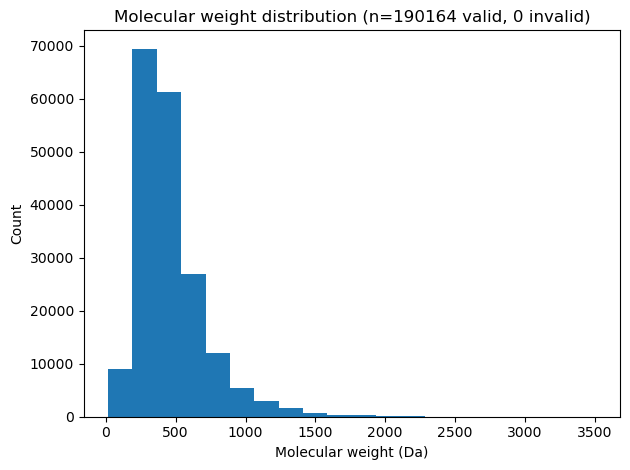

In [1]:
import pickle
import os
from tqdm import tqdm
from typing import List, Tuple
from rdkit import Chem
from rdkit.Chem import Descriptors
import matplotlib.pyplot as plt

DATASET_ROOT = '/data/nas-gpu/wang/atong/MoonshotDatasetv3'

index: dict[int, dict] = pickle.load(open(os.path.join(DATASET_ROOT, 'index.pkl'), 'rb'))
all_smiles: list[str] = list(set([e['smiles'] for e in index.values()]))

def smiles_molweights(smiles_list: List[str]) -> Tuple[List[float], List[Tuple[int, str]]]:
    """
    Returns:
      weights: list of molecular weights (Da) for valid SMILES
      invalid: list of (index, smiles) for invalid SMILES
    """
    weights: List[float] = []
    invalid: List[Tuple[int, str]] = []

    for i, smi in enumerate(tqdm(smiles_list)):
        if smi is None:
            invalid.append((i, smi))
            continue
        mol = Chem.MolFromSmiles(smi)
        if mol is None:
            invalid.append((i, smi))
            continue
        weights.append(float(Descriptors.MolWt(mol)))

    return weights, invalid

def plot_mw_histogram(
    smiles_list: List[str],
    bins: int = 50,
    title: str = "Molecular weight distribution",
):
    weights, invalid = smiles_molweights(smiles_list)

    if len(weights) == 0:
        raise ValueError("No valid SMILES found; cannot plot histogram.")

    plt.figure()
    plt.hist(weights, bins=bins)
    plt.xlabel("Molecular weight (Da)")
    plt.ylabel("Count")
    plt.title(f"{title} (n={len(weights)} valid, {len(invalid)} invalid)")
    plt.tight_layout()
    plt.show()

    if invalid:
        print("Invalid SMILES (index, smiles):")
        for i, smi in invalid[:50]:
            print(f"  {i}: {smi}")
        if len(invalid) > 50:
            print(f"  ... and {len(invalid) - 50} more")

plot_mw_histogram(all_smiles, bins=20)
